### EDA - Test for Multicollinearity - TBC
Iterate through fundamental data by ticker and find attributes with high correlation - compile statistics for all tickers

In [2]:
import operator
import math
import random
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import urllib
import json
import requests
from io import StringIO

from pathlib import Path
from eod import EodHistoricalData

from functools import partial

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from collinearity import SelectNonCollinear

pd.set_option('display.max_rows', None)

In [3]:
#paths for data - set prefix to location of Data folder
path_prefix = r'D:'
path_att = r'\Data\fundamentals_by_attribute'
path_fun = r'\Data\fundamentals_by_ticker'
path_std = r'\Data\standardised_fundamentals'
path_eda = r'\Data\exploratory_data_analysis'
path_rob = r'\Data\robust_scaling'
path_cor = r'\Data\correlation_matrices'

os.chdir(path_prefix + path_fun)

In [4]:
files = [f for f in os.listdir() if os.path.isfile(f)]

In [5]:
#create correlation matrices for every ticker 
for file in files:
    filepath = Path(path_prefix + path_fun + "/" + file)
    
    try:
        df_fun = pd.read_csv(filepath, index_col=0).transpose()
        df_fun.drop(['date', 'filing_date', 'currency_symbol'], inplace=True, axis=1)
        df_fun = df_fun.astype(np.float64)
        df_fun.sort_index(ascending=False, inplace=True)

        df_corr = df_fun.corr()
        file = file.replace('fun', 'cor')
        
        df_corr.to_csv(r'C:\Users\OEM\GDrive\WQU\Data\correlation_matrices\{}'.format(file))
                    
    except:
        print('Error')

Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error


In [25]:
#Instantiate datasource client
api_key = "618f834b7bfe27.18132752"
client = EodHistoricalData(api_key)

In [26]:
#get ticker symbols from exchange
resp = client.get_exchange_symbols(exchange='NYSE')

In [27]:
#create list of stock tickers
tickers = []
for i in range(len(resp)):
    if resp[i]['Type'] == 'Common Stock' or resp[i]['Type'] == 'Preferred Stock' :
        ticker = resp[i]['Code']
        tickers.append(ticker)

In [ ]:
for ticker in tickers:
    filepath = Path(path_prefix + path_cor + '/df_cor_{}.csv'.format(ticker))
    
    if os.path.isfile(filepath) == True:
        df_cor = pd.read_csv(filepath, index_col=0)
        df_cor.fillna(0, inplace=True)
        filepath = Path(path_prefix + path_cor + "/df_all_correlations.csv")
        
        if os.path.isfile(filepath) == False:
            filepath.parent.mkdir(parents=True, exist_ok=True)  
            df_cor.to_csv(filepath)
            
        else:  
            df_all_cor = pd.read_csv(filepath, index_col=0)
            
            if df_all_cor.isna().sum().any() > 0:
                print("AAAAAAAAAAAAAAAAAARGH")
            df_all_cor = df_all_cor + df_cor
            df_all_cor.to_csv(filepath)
            print(ticker + " complete")

In [ ]:
for ticker in tickers:
    filepath = Path(path_prefix + path_cor + '/df_cor_{}.csv'.format(ticker))
    
    if os.path.isfile(filepath) == True:
        df_cor = pd.read_csv(filepath, index_col=0)
        df_count = df_cor.applymap(lambda x: math.isnan(x))
        df_count = df_count.applymap(lambda x: 0 if x == True else 1)
        
        filepath = Path(path_prefix + path_cor + "/df_count_correlations.csv")

        if os.path.isfile(filepath) == False:
            filepath.parent.mkdir(parents=True, exist_ok=True)  
            df_count.to_csv(filepath)
            
        else:  
            df_all_count = pd.read_csv(filepath, index_col=0)
            df_all_count = df_all_count + df_count
            df_all_count.to_csv(filepath)
            print(ticker + " complete")

In [7]:
df_cors = pd.read_csv(r"D:\Data\correlation_matrices\df_all_correlations.csv", index_col=0)
df_counts = pd.read_csv(r"D:\Data\correlation_matrices\df_count_correlations.csv", index_col=0)

In [8]:
df_mean_cors = df_cors / df_counts
df_mean_cors.sort_values(inplace=True, by='totalAssets')

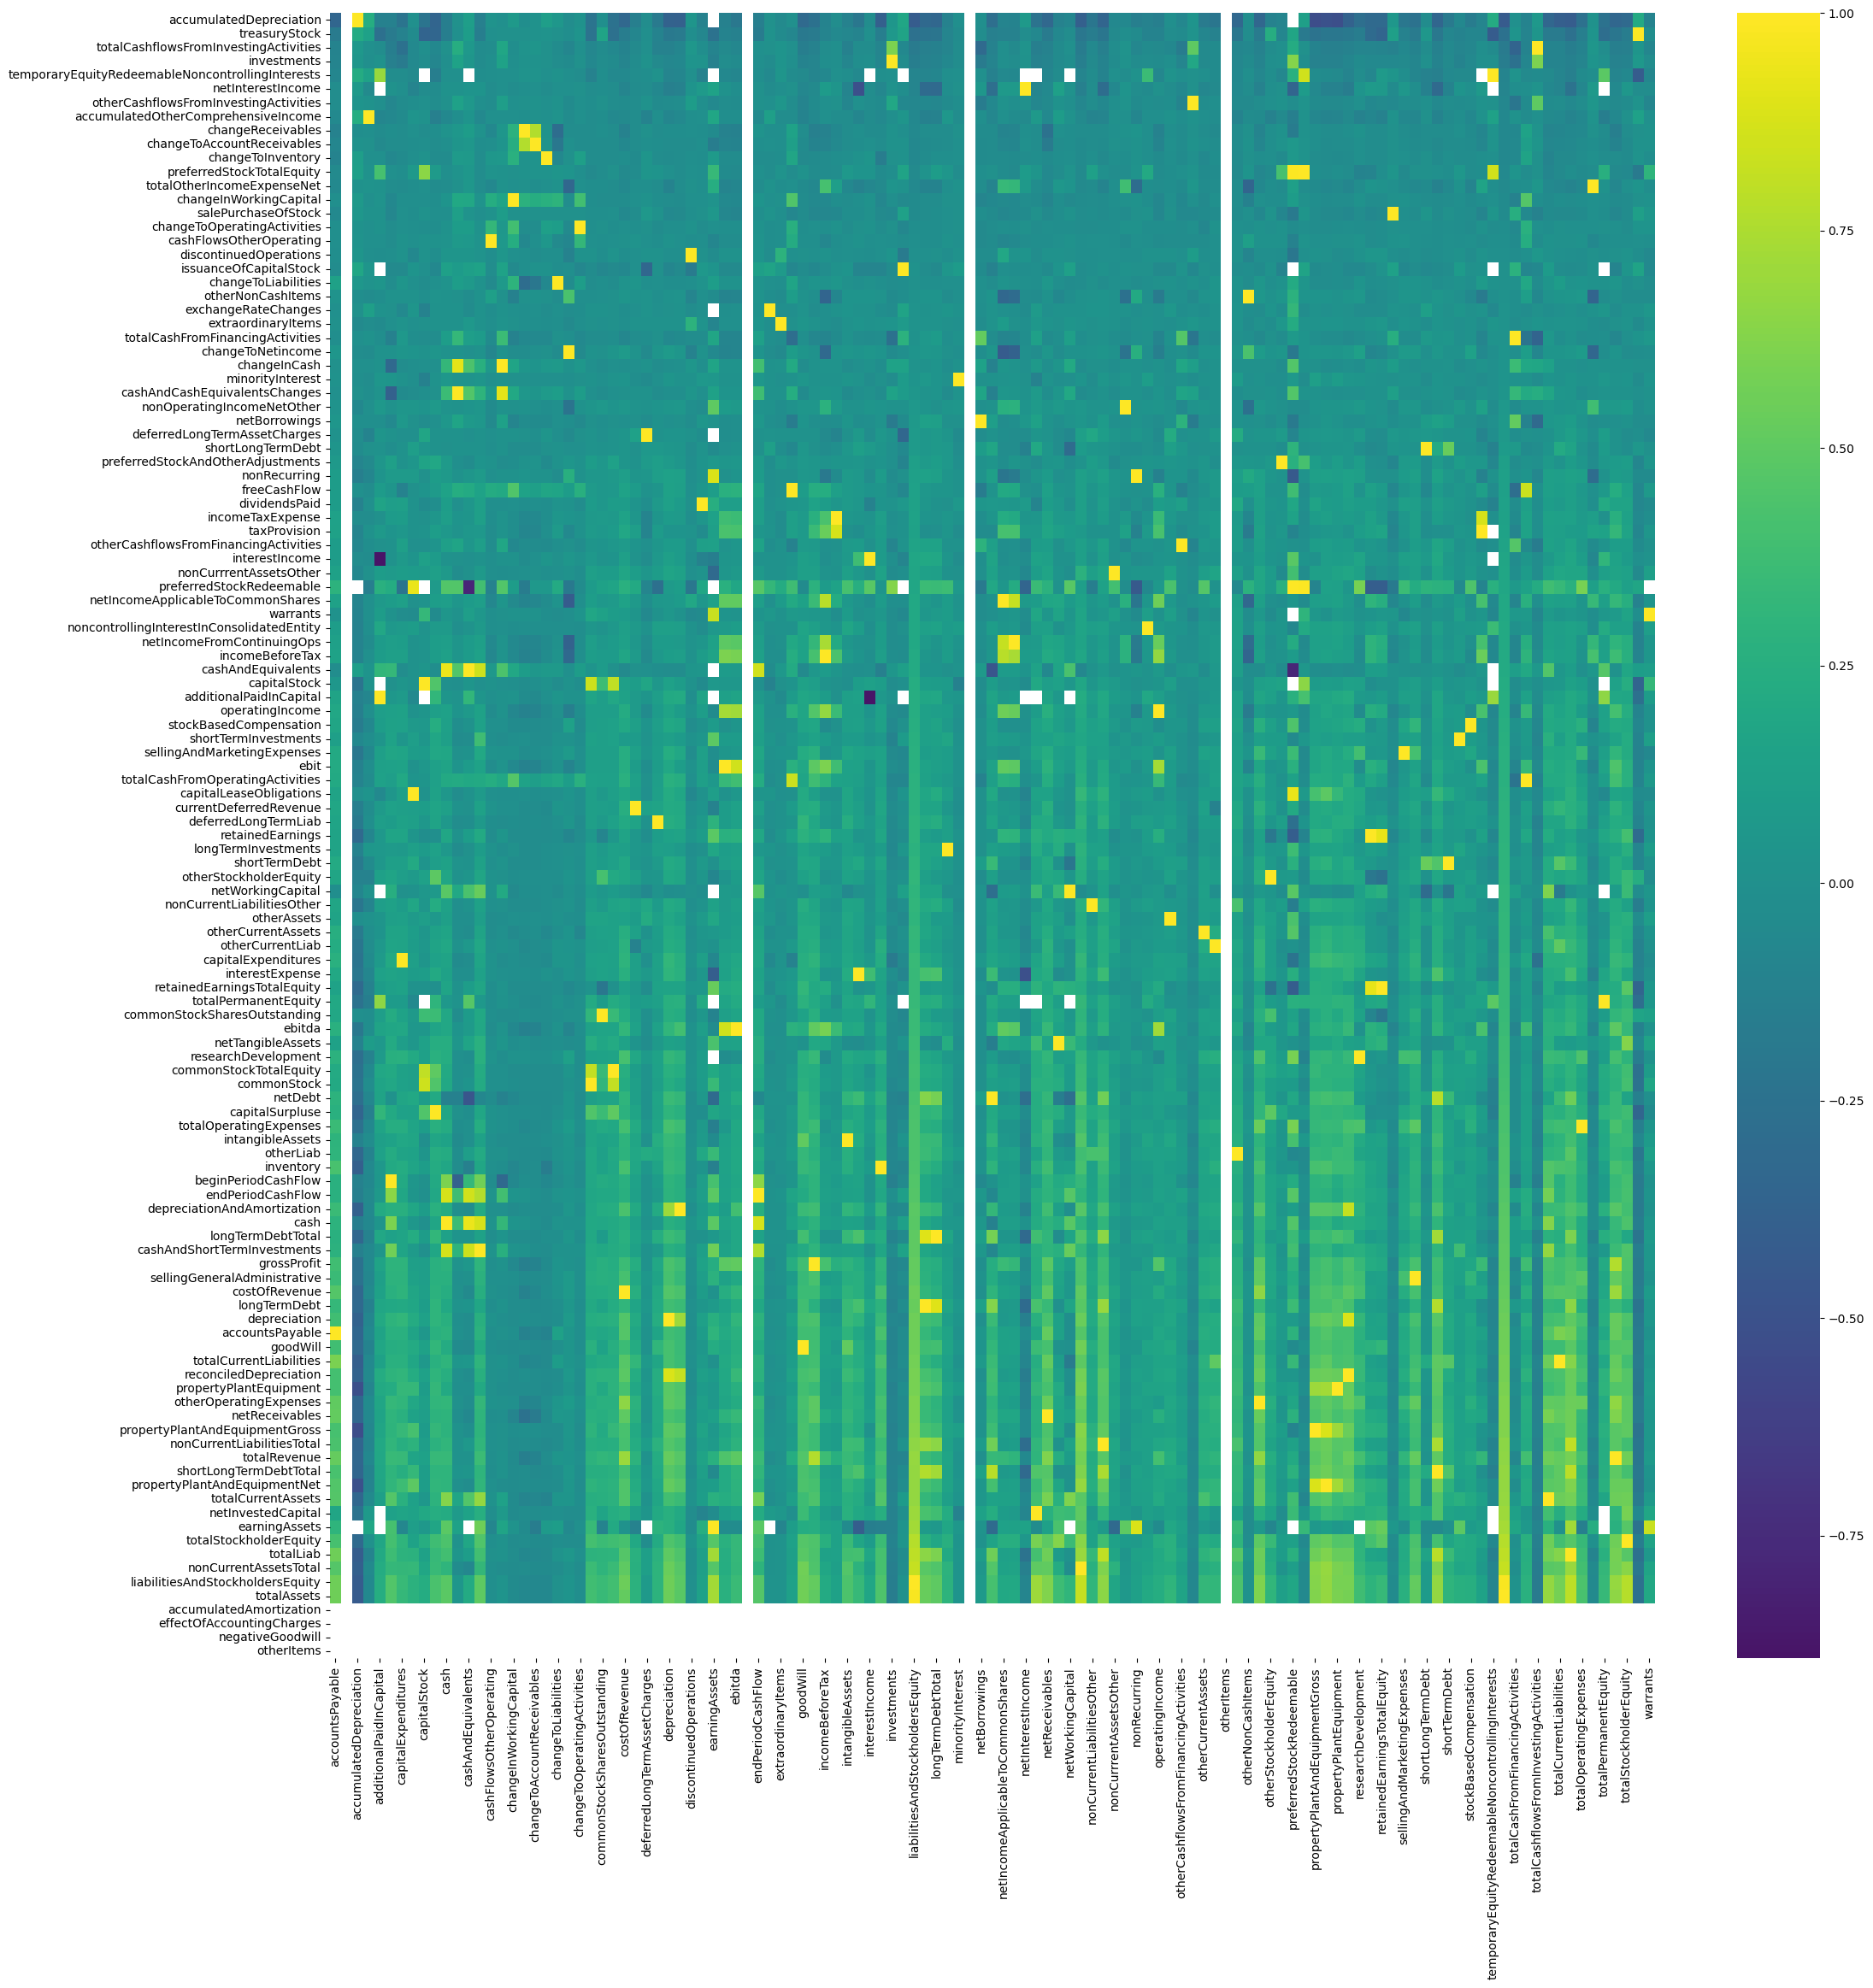

In [10]:
plt.figure(figsize=(25,25))
sns.heatmap(df_mean_cors, center=0, cmap='viridis')
plt.savefig(r"D:\Data\mean correlations.jpg")

In [ ]:
coco.isna().sum().any() > 0

In [19]:
cor = pd.read_csv(path_prefix + path_cor + '/df_cor_AA.csv', index_col=0)

In [11]:
cor + cor

,totalAssets,intangibleAssets,earningAssets,otherCurrentAssets,totalLiab,totalStockholderEquity,deferredLongTermLiab,otherCurrentLiab,commonStock,capitalStock,...,otherItems,incomeTaxExpense,totalRevenue,totalOperatingExpenses,costOfRevenue,totalOtherIncomeExpenseNet,discontinuedOperations,netIncomeFromContinuingOps,netIncomeApplicableToCommonShares,preferredStockAndOtherAdjustments
totalAssets,2.000000,0.924376,NaN,-0.017171,-0.210354,1.317790,-0.448998,-0.477874,0.802924,NaN,...,NaN,0.888564,0.927834,0.859892,0.833706,-0.544750,NaN,-0.227717,0.179800,NaN
intangibleAssets,0.924376,2.000000,NaN,-0.016002,-1.081285,1.364984,-0.631453,-0.261334,1.253146,NaN,...,NaN,-0.097212,0.913101,1.140805,0.939996,-0.527815,NaN,-0.170470,-0.096791,NaN
earningAssets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
otherCurrentAssets,-0.017171,-0.016002,NaN,2.000000,-0.363547,0.346806,0.618621,1.126264,0.085715,NaN,...,NaN,0.130865,0.414880,0.321913,0.484434,-0.522001,NaN,-0.071463,-0.262640,NaN
totalLiab,-0.210354,-1.081285,NaN,-0.363547,2.000000,-1.629349,0.601903,0.240772,-1.731478,NaN,...,NaN,0.404183,-0.485007,-0.708007,-0.612654,0.694463,NaN,0.138874,0.806010,NaN
totalStockholderEquity,1.317790,1.364984,NaN,0.346806,-1.629349,2.000000,-0.747515,-0.368998,1.770955,NaN,...,NaN,0.243992,0.923866,1.043197,0.965473,-0.862034,NaN,-0.225642,-0.502311,NaN
deferredLongTermLiab,-0.448998,-0.631453,NaN,0.618621,0.601903,-0.747515,2.000000,1.633973,0.386508,NaN,...,NaN,0.683323,0.692688,-1.090526,0.480429,-0.357196,NaN,0.021379,0.500172,NaN
otherCurrentLiab,-0.477874,-0.261334,NaN,1.126264,0.240772,-0.368998,1.633973,2.000000,-0.276189,NaN,...,NaN,0.217085,0.247294,0.128653,0.252290,-0.158360,NaN,0.179494,0.258796,NaN
commonStock,0.802924,1.253146,NaN,0.085715,-1.731478,1.770955,0.386508,-0.276189,2.000000,NaN,...,NaN,0.032641,0.862150,1.040056,0.912815,-0.930222,NaN,-0.308646,-0.528217,NaN
capitalStock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
